# Tiesinė regresija atsakymas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')

In [4]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Užduotis
Turime lentelę su 7 žuvų rūšim, bei įvairiais jų išmatavimais. Vienas iš jų yra svoris - tai bus mūsų *target* stulpelis. **Sukurkite tiesinės regresijos modelį, kuris pagal kitus lentelės stulpelius spėlios žuvies svorį.** Išsiaiškinkite, ar yra trūkstamų reikšmių, atsispausdinkite keletą diagramų ir histogramų, patyrinėkite tendencijas ir koreliacijas. Kilus neaiškumams, remkitės paskaitos medžiaga. Sėkmės!


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<Axes: xlabel='Species', ylabel='count'>

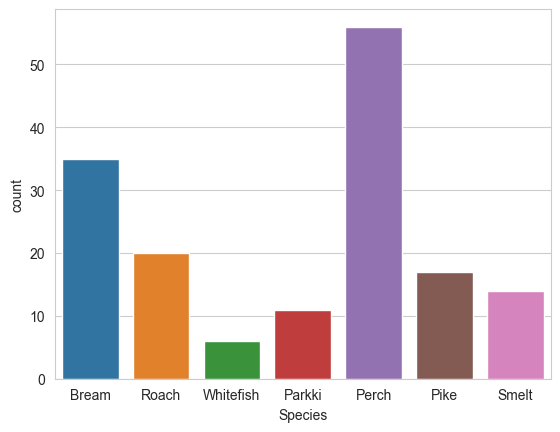

In [7]:
sns.set_style('whitegrid')
sns.countplot(x=fish['Species'])

<Axes: xlabel='Species', ylabel='Weight'>

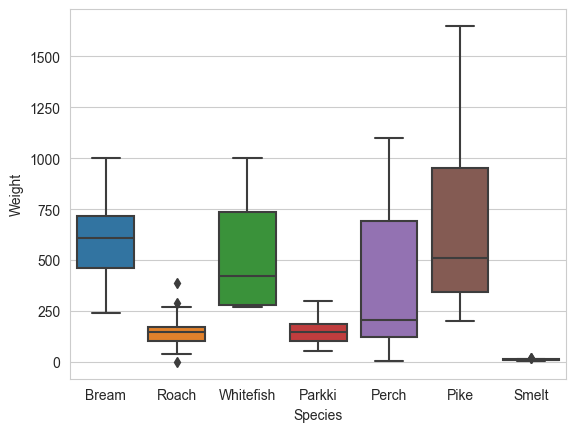

In [8]:
sns.boxplot(x='Species', y='Weight', data=fish)

<Axes: >

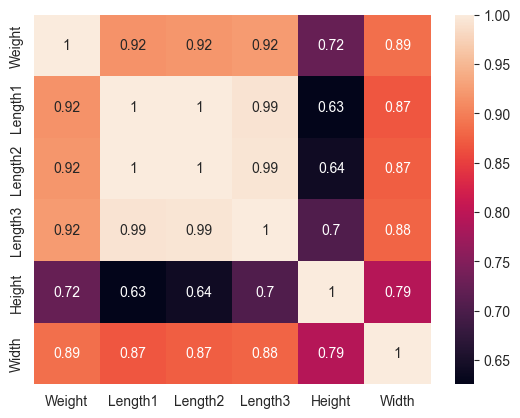

In [10]:
sns.heatmap(fish.corr(numeric_only=True), annot=True)

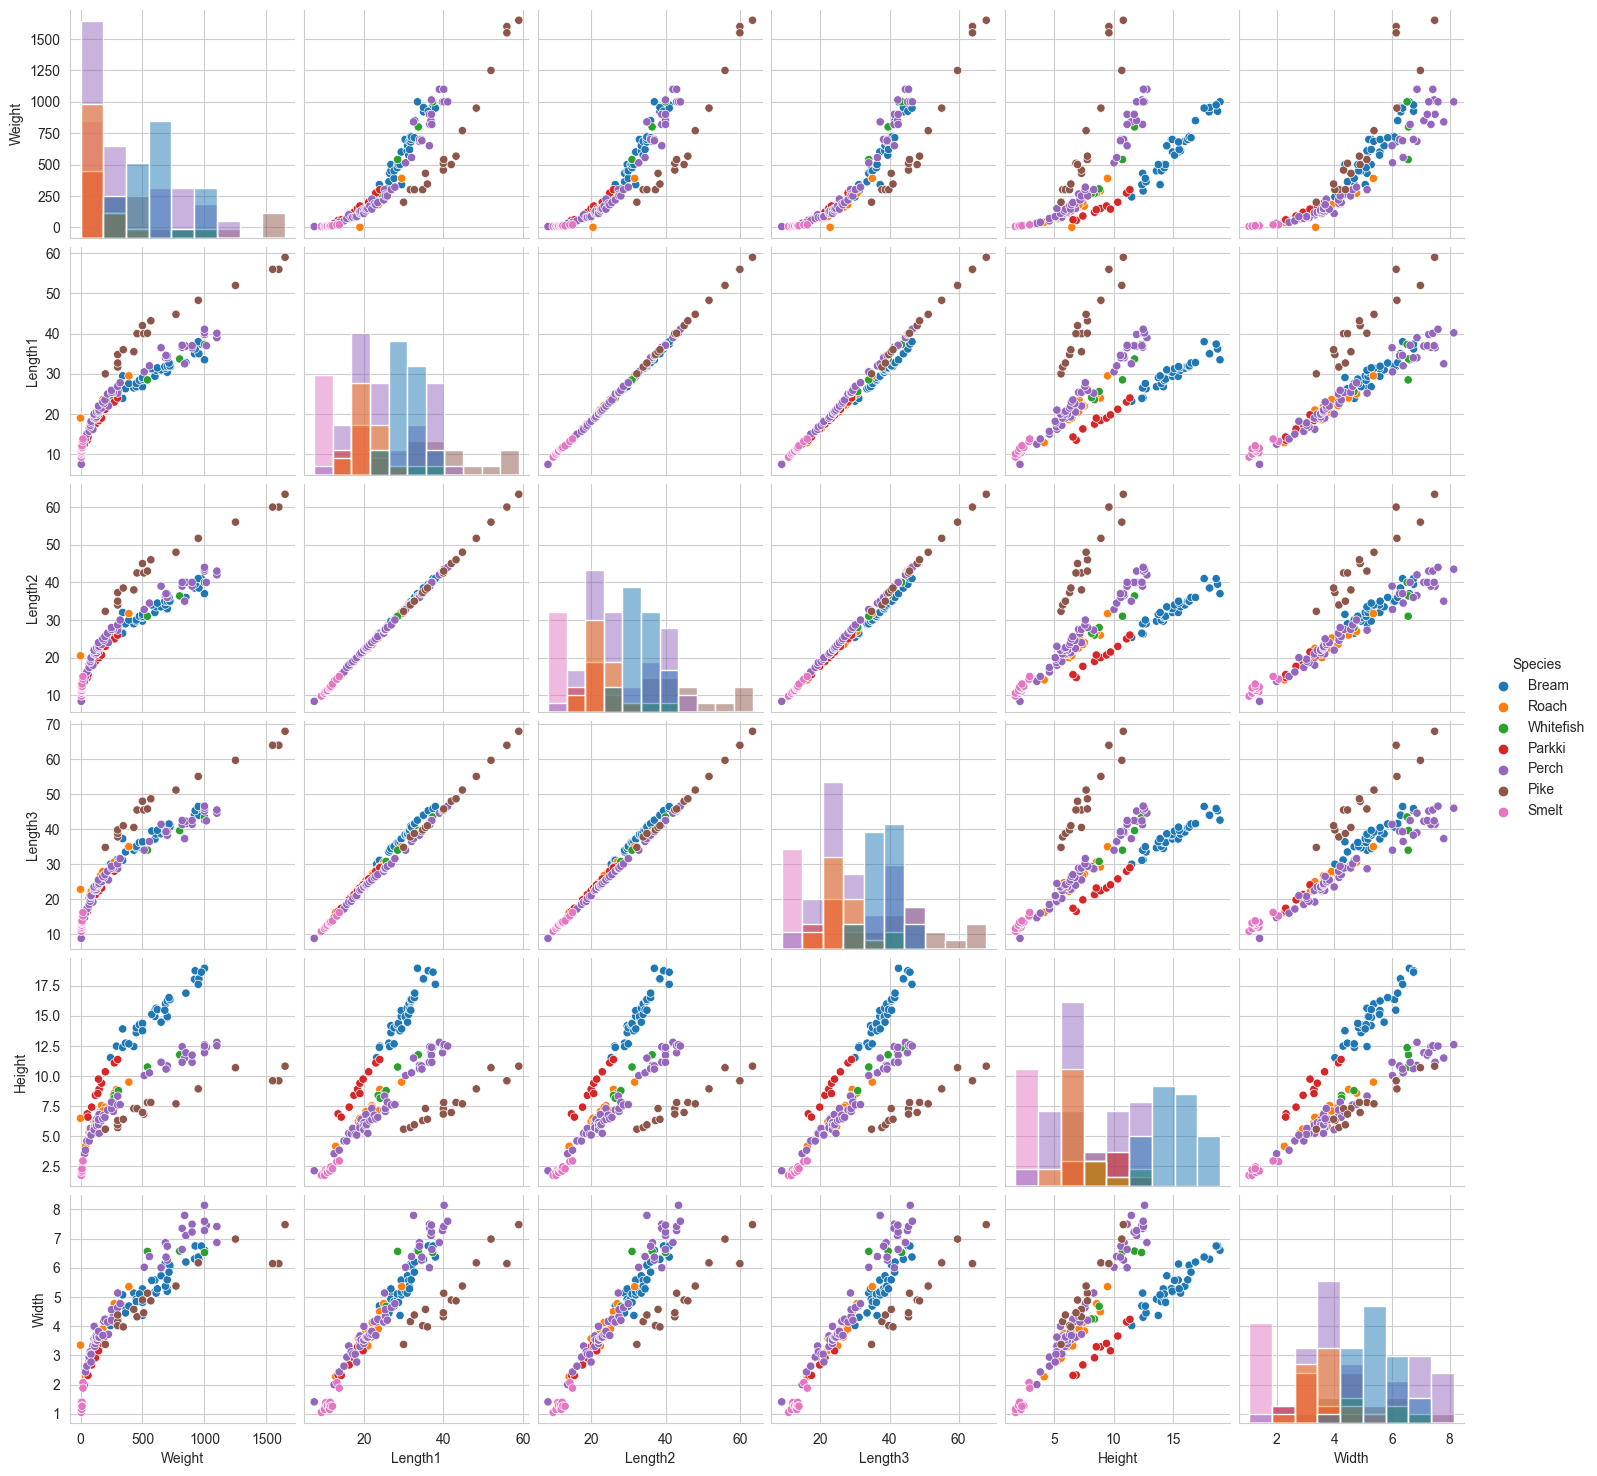

In [11]:
sns.pairplot(fish, hue='Species', diag_kind='hist')

In [12]:
dummies = pd.get_dummies(fish['Species'])
data = pd.concat([fish, dummies], axis=1)
data.drop('Species', axis=1, inplace=True)

In [13]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [14]:
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [15]:
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]
y = data['Weight']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [18]:
reg.score(X_test, y_test)

0.9405192628555377

In [19]:
preds = reg.predict(X_test)

In [20]:
new_column = pd.Series(data=preds, name='Pred_Weight')

In [21]:
new_column.head()

0     25.241369
1      0.595421
2    208.449859
3    331.665261
4    215.482994
Name: Pred_Weight, dtype: float64

In [22]:
y_test.head()

78      78.0
155     13.4
128    200.0
55     270.0
94     150.0
Name: Weight, dtype: float64

In [23]:
res = pd.concat([y_test.reset_index(), new_column], axis=1)[['Weight', 'Pred_Weight']]

In [24]:
res

,Weight,Pred_Weight
0,78.0,25.241369
1,13.4,0.595421
2,200.0,208.449859
3,270.0,331.665261
4,150.0,215.482994
5,1000.0,753.929942
6,7.0,-72.458507
7,180.0,253.698723
8,188.0,259.678480
9,1250.0,1186.485729
